In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
test = pd.read_csv('titanic_test.csv')

In [73]:
train = pd.read_csv('titanic_train.csv')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


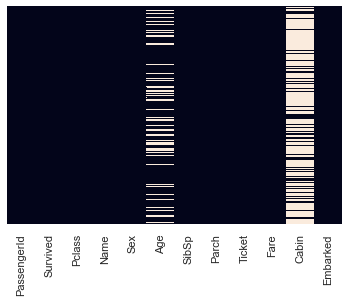

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

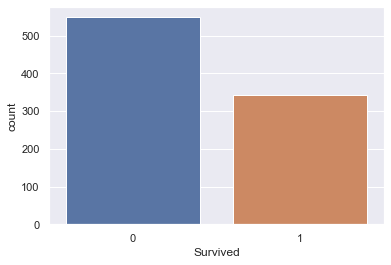

In [9]:
sns.countplot(x='Survived',data=train)

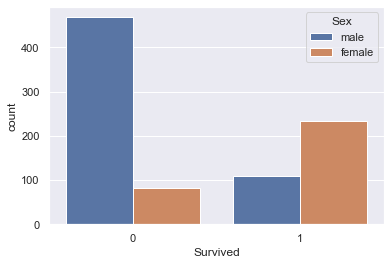

In [10]:
sns.countplot(data=train,x='Survived',hue='Sex')

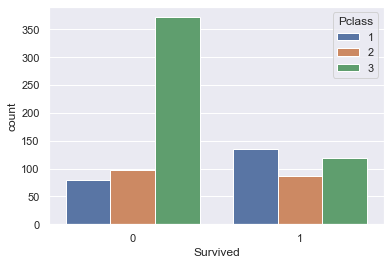

In [11]:
sns.countplot(x='Survived',data=train,hue='Pclass')

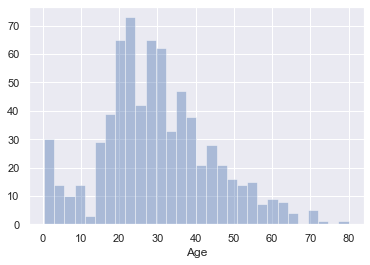

In [14]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

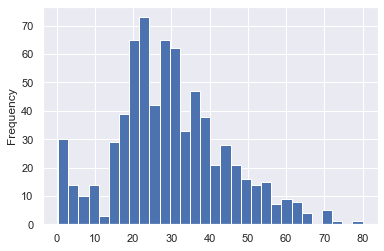

In [16]:
train['Age'].plot.hist(bins=30)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


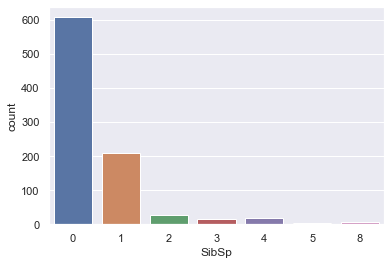

In [18]:
sns.countplot(x='SibSp',data=train)

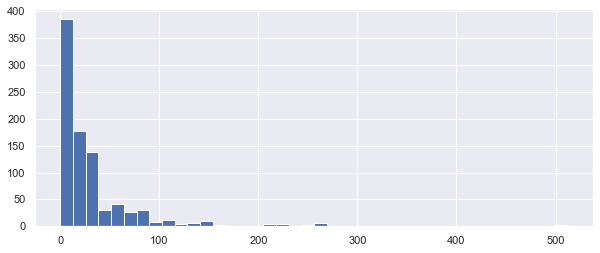

In [22]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [23]:
import cufflinks as cf
cf.go_offline()

In [26]:
#train['Fare'].iplot(kind='hist',bins=30)

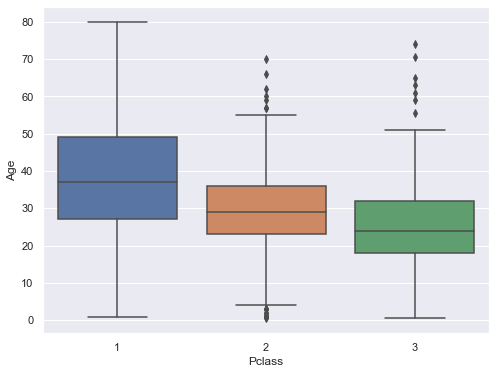

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [74]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [75]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

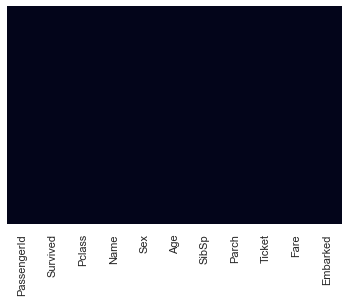

In [80]:
sns.heatmap(data=train.isnull(),cbar=False,yticklabels=False)

In [77]:
train.drop('Cabin',axis=1,inplace=True)

In [78]:
train.dropna(inplace=True)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:
sex = pd.get_dummies(train['Sex'],drop_first=True,dtype=float)

In [86]:
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [87]:
embark = pd.get_dummies(train['Embarked'],drop_first=True,dtype=float)

In [88]:
embark.head()

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [89]:
train = pd.concat([train,sex,embark],axis=1)

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0,1.0


In [91]:
train.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [92]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [93]:
train.drop('PassengerId',axis=1,inplace=True)

In [94]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [95]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr = LogisticRegression(solver='liblinear')

In [112]:
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [113]:
predictions = lr.predict(X_test)

In [114]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]


In [119]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)